# **$$ h_\theta (x) = y_{predicted} $$**

# Classification Problems

#### Binary classification problem

$$ y \in \{ 0,1 \} $$


In case of a **Linear classifier**: 

Where $$ h_\theta (x) = \sum_{x=0}^n X_{m \times n} \theta_{n \times 1}  $$


$$~           /
1|      x x x 
  |       / 
  |      / 
  |     /
0|_x_x_x_______
     /
$$

We can threshold the classifier output $h_\theta (x)$ at 0.5.

* if $h_\theta \ge 0.5 ; ~predict~ y=1$

* if $h_\theta \le 0.5 ; ~predict~ y=0$

Drawbacks:
   
   1. Linear classifier is highly influenced by outiers, since the *mean* changes drastically.


   2. Although $0 \le y \le 1$, linear regression may yeild $ 0 > h_\theta (x)>1$

## Logistic Regression (classification)

Logistic Regression overcomes the drawbacks by limiting $ 0  \le h_\theta (x) \le 1$

    Logistic Classification == Logistic Regression

### Logistic regression model


$$ h_\theta (x) = g \big( X \theta  \big)  = g \big( \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3+ .... + \theta_n x_n  \big) $$
    
Where $ g(z)$  is the Sigmoid/Logistic function

$$ g(z) = \frac{1}{1+e^{-z}} $$

$$ \therefore~h_\theta (x) = \frac{1}{1+e^{-X\theta}} $$


#### Interpretation of Hypothesis output

$h_\theta(x)$ is the estimated probability that $y=1$ on input $x$


If the output $h_\theta(x)$ = 0.7 means there is 70% chance that the outcome is true.

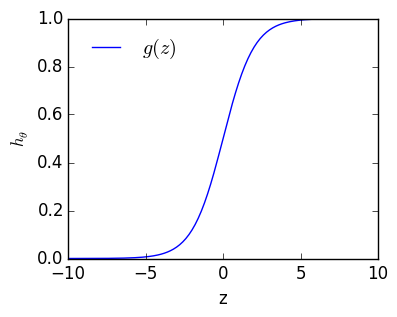

In [24]:
z = collect(-10:0.1:10)

function g(z)
    var1 = 1+exp(-z)
    return 1./var1
end

using PyPlot

PyPlot.figure(figsize=(4,3))

plot(z, g(z), label = L"g(z)")

PyPlot.xlabel("z")
PyPlot.ylabel(L"h_\theta")
PyPlot.legend(loc=2, framealpha=0);

Linear regression recall:

$ error (\epsilon)= h_\theta - X  \theta $

$J(\theta_i) = \frac{1}{2m} \sum_{i=1}^m [h_\theta(x^i)-y^i)]^2 $

Simply rewriting the cost function $J(\theta_i)$

$$J(\theta_i) = \frac{1}{m} \sum_{i=1}^m Cost( h_\theta(x^i), y^i) $$

### Cost/Error Function for Logistic regression

+ If y = 1
    + $Cost(h_\theta(x), y) = -log(h_\theta(x))$ 


+ If y = 0
    + $Cost(h_\theta(x), y) =-log(h_\theta(1-x))$



**The cost function can be simplified to:**

$$\begin{align*}J(\theta) &= \frac{1}{m}\sum\limits_{i=0}^m Cost( h_\theta(x^{(i)},y^{(i)})  \\ &= -\frac{1}{m}\left[\sum\limits_{i=0}^m y^{(i)} log h_\theta(x^{(i)}) + (1-y^{(i)}) log (1-h_\theta(x^{(i)}) \right] \end{align*}$$


In [137]:
# X = features matrix
# y = target vector (y = 0 or 1)
# θ = parmeter vector

# For each hypothesis

function logistic_cost_function(X, y, θ)
    m = length(y)

    unit_vec = ones(length(y))
    X1 = hcat(unit_vec,X)

    prediction = 1./(1+exp(X1*(-θ))) 
    # h₀ will be a vector, 
    # each element in h₀ vector => f(x1,x2,x3...).

    log_cost =  sum(.*(log(prediction), y) + 
                    .*((1.0 - y), log(1-prediction))
                    )
    cost = -log_cost / m
    return cost
end

logistic_cost_function (generic function with 1 method)

In [132]:
X = [0.99, 0.001, .99]
y = [1, 0, 1]

θ = [0, 1]

logistic_cost_function(X, y, θ)

0.3226958325048981

### Gradient descent to minimize $J_\theta$

Gradient descent is a generalized algorithm which can be applied for a linear hypothesis.

$$\theta_j := \theta_j -\alpha \frac{\partial}{\partial \theta_j} J(\theta)$$



$ J(\theta) = -\frac{1}{m} [\sum\limits_{i=0}^m y^{(i)} log h_\theta(x^{(i)}) + (1-y^{(i)}) log (1-h_\theta(x^{(i)}) ] $

$\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m}\sum\limits_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$.


After substituting $J_{\theta}$ and similifying

$$ \theta_j := \theta_j - \alpha \sum^m_{i=1} \Big( h_\theta(x^i) - y^i \Big)x_j^i
$$

Note:

The gradient is the same form as the gradient used in the linear case. However, the $h_\theta$ is different

$h_\theta$ for *Linear* = $X \theta$

$h_\theta$ for *Logistic* = $ \frac{1}{1+e^{X\theta}}$

In [140]:
function logistic_gradient_descent(X, y, α, iterations)
    m = length(y)
        
    # add dummy to X
    uv = ones(size(y)[1])
    X1 = hcat(uv,X)
    
    #initialize thetas to zero
    θ = zeros((size(X1)[2])) 

    cost_history = zeros(0)
    
    for i in 1:iterations
        prediction = 1./(1+exp(X1*(-θ)))
        loss = prediction - y
        
        log_cost = sum(.*(log(prediction), y) + 
                       .*((1.0 - y), log(1-prediction))
                      )
        cost = -log_cost/m
        push!(cost_history, cost)
        
        gradient = transpose(X1)*loss
        θ = θ - α*gradient
    end
    return θ, cost_history
end

logistic_gradient_descent (generic function with 1 method)

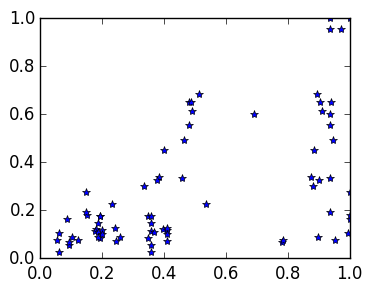

In [147]:
using DataFrames

df = readtable("src/printingBusiness", separator=' ', header=true)
x1 = df[2]/maximum(df[2])
x2 = df[3]/maximum(df[3])

X = hcat(x1,x2)

y = df[4]/maximum(df[4]);

PyPlot.figure(figsize=(4,3))
plot(X,y, "b*");

θ = [-3.5368978642342324,1.1431605877930047,5.492015142179587]

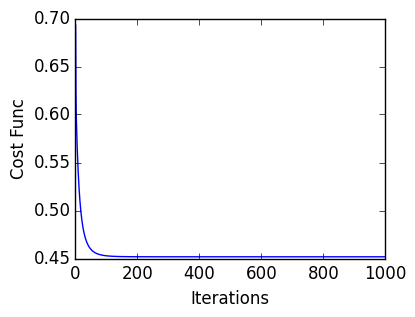


logistic_cost_function(X,y,θ) = 0.45177688984333425


In [142]:
iterations = 1000

θ, cost_hist = logistic_gradient_descent(X, y, 0.1, iterations)

@show θ
@show logistic_cost_function(X, y, θ)


PyPlot.figure(figsize=(4,3))
plot(1:iterations,cost_hist, "b-")

PyPlot.xlabel("Iterations")
PyPlot.ylabel("Cost Func");
